# Import Libraries & Modules

In [1]:
# import system libraries
import sys
import os
import glob

# import Data Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                        

%matplotlib inline

# Set paths for custom modules
sys.path.insert(0, './helpers')
sys.path.insert(0, './models')

# Image Loader functions
from data_loader import dir_loader_stack
from data_loader import csv_loader_stack
from data_loader import image_plot
from data_loader import val_train_split

# Model classes
from resnet50 import Resnet50_pretrained

# Model helpers
from model_helpers import train
from model_helpers import predict
from model_helpers import plot_train_history

# torch temp
import torch.nn as nn
import torch.optim as optim
import torch

# Load Image Data Sets

In [2]:
# Set Dataset root directory
data_dir = '../datasets/animals/'

In [3]:
# Data Loader arguments
img_size = 244
batch_size = 32
num_workers = 0                                                                                    

### Data From CSV Example

In [4]:
# Image path & Label CSV to DataFrame
train_df = pd.read_csv('../datasets/animals/labels.csv')

# Verify data looks how it should
train_df.head(2)

,FilePath,Label
0,cats/cats_00072.jpg,cat
1,cats/cats_00073.jpg,cat


In [5]:
# One hot encoding for csv labels
train_df.Label = pd.Categorical(pd.factorize(train_df.Label)[0])

# Verify data looks how it should
train_df.head(2)

,FilePath,Label
0,cats/cats_00072.jpg,0
1,cats/cats_00073.jpg,0


### If no separate validation data
split shuffled training data into train & validate

In [6]:
# Create Train & Validation split
train_df, val_df = val_train_split(train_df, 0.2)

Train Shape: (2280, 2)
Validation Shape: (570, 2)


In [7]:
# remember you can always print function docstring
print(val_train_split.__doc__)


    This function function does a train / Validation split on a data frame

    Example use:
        train_df, val_df = val_train_split(df_lab, 0.2)

    args:
    - df (pandas DataFrame): DataFrame containing dataset to split
    - split(float): percent to spit into validation set (0.2 = 20%)
    - verbose=False(bool): option for printing DataFrames from function
    - seed=42(int): random seed
    - shuffle=True(bool): shuffle rows before splitting DataFrame

    returns:
    - training & validation data frames

    TODO:
    - stratify data 
    


### Else if validation data is separate:
Create another data frame and one hot encode its labeling just like the training dataset

In [24]:
# Image path & Label CSV to DataFrame
val_df = pd.read_csv('../datasets/test_animals/test_labels.csv')

# Verify data looks how it should
train_df.head(2)

,FilePath,Label
0,cats/cats_00267.jpg,0
1,cats/cats_00442.jpg,0


In [25]:
# One hot encoding for csv labels
val_df.Label = pd.Categorical(pd.factorize(val_df.Label)[0])

# Verify data looks how it should
train_df.head(2)

,FilePath,Label
0,cats/cats_00267.jpg,0
1,cats/cats_00442.jpg,0


### create data loaders from data frames

In [8]:
train_loader = csv_loader_stack(data_dir,train_df, 'FilePath', 'Label',
                        img_size,batch_size,num_workers,True)

val_loader = csv_loader_stack(data_dir,val_df, 'FilePath', 'Label',
                        img_size,batch_size,num_workers,False)

In [9]:
# remember you can always print function docstring
print(csv_loader_stack.__doc__)


    This function stacks all functions needed to load and preprocess image data
       from a CSV file to train models in one place.

    Example use:
    train_loader = csv_loader_stack('/datasets/animals/', train_df, 'FilePath',
     'Label', 244, 32, 0, True)


    args:
    - data_root(str): path to root directory containing image paths from CSV
    - df (Pandas DataFrame): contaning file paths and labels in two columns
    - path_col (str): column containig the file paths
    - label_col (str): column containing the labels for each image
    - img_size (int): what size the image should be scaled to
    - batch_size(int): Batch size to load in for model training
    - num_workers(int): Number of workers for multi-process data loading
    - shuffle=False(bool): Shuffle data or not

    Returns:
    - DataLoader object for loading images from the CSV file given


    


## Data from Directory Examples:

### If no separate validation data
split shuffled training data into train & validate

In [17]:
# Create Train & Validation split from data loader
loader = dir_loader_stack(data_dir, img_size, batch_size,
                            num_workers, True)
train_size = int(0.8 * len(loader.dataset))
test_size = len(loader.dataset) - train_size
train_data, val_data = torch.utils.data.random_split(loader.dataset,
                                                [train_size, 
                                                test_size])


In [18]:
# Create train & validation data loaders from directory
train_loader = torch.utils.data.DataLoader(train_data,
                                            batch_size=batch_size)
val_loader = torch.utils.data.DataLoader(val_data, 
                                            batch_size=batch_size)

### Else if validation data is separate:

In [ ]:
# create data loader for training dataset
train_loader =  dir_loader_stack(data_dir, img_size, batch_size, 
                                                    num_workers, True)
# create data loader for validation dataset           
val_loader = dir_loader_stack(val_data, img_size, batch_size, 
                                                        num_workers,False)

In [27]:
# remember you can always print function docstring
print(dir_loader_stack.__doc__)


    This function stacks all functions needed to load and preprocess image data
       from a directory to train models in one place.

    Example use:
    train_loader = dir_loader_stack('data/animals/', 244, 32, 0, True)

    args:
    - data_dir(str): path to directory with images in class sub folders
    - img_size (int): what size the image should be scaled to
    - batch_size(int): Batch size to load in for model training
    - num_workers(int): Number of workers for multi-process data loading
    - shuffle=False(bool): Shuffle data or not 

    Returns:
    - DataLoader object for loading images from a directory from the path given
    


### Create loaders object

In [20]:
loaders = {
    'train':train_loader,
    'valid':val_loader
}

### Verify images & labels seem OK

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


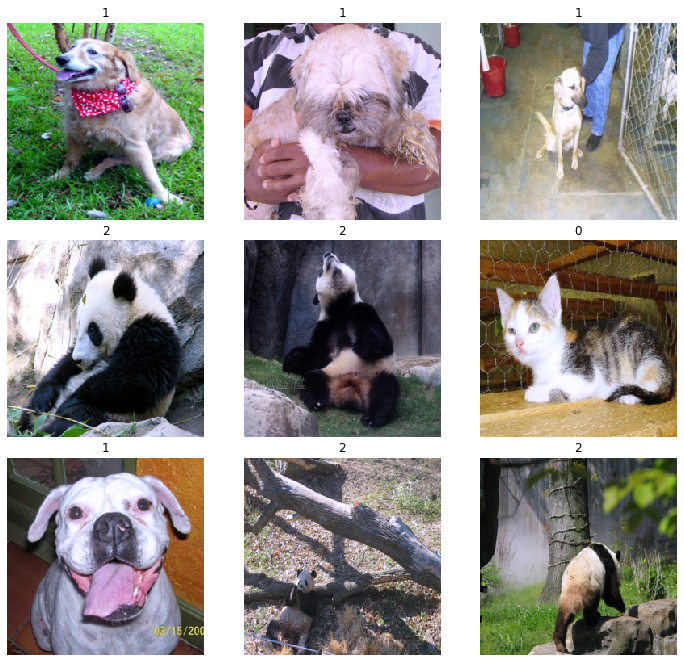

In [21]:
image_plot(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


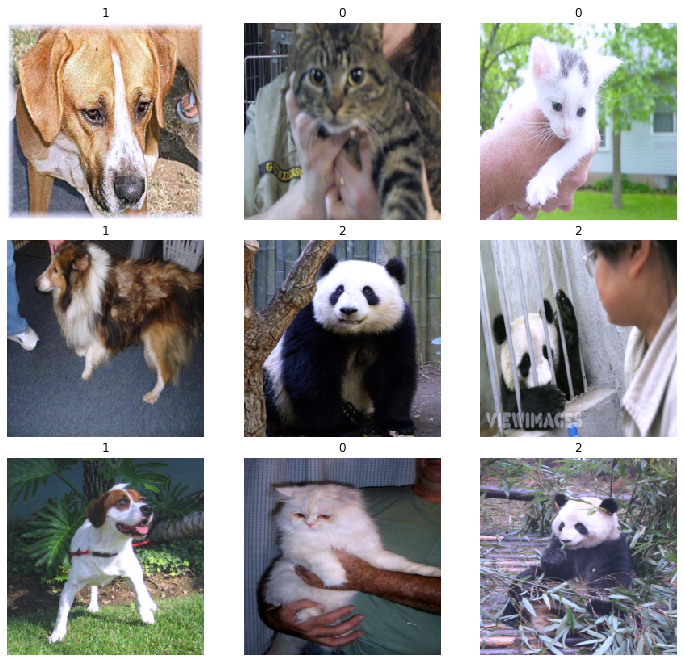

In [22]:
image_plot(val_loader)

### Create Model

In [16]:
# Model Parms

# Number Classes to predict
num_classes = 3

# Compute device (cuda = GPU)
device = 'cuda'

In [17]:
# create model from object

In [18]:
res_model = Resnet50_pretrained(num_classes)

In [19]:
# res_model = res_model.build()

### Train Model

In [20]:
# Train Params
n_epochs = 10
learn_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(res_model.model.fc.parameters(), lr=learn_rate)

device = 'cuda'
save_path = 'test_train.pt'

### If continuing from already trained weights

In [29]:
H = train(res_model.model, n_epochs, loaders, optimizer,
                    criterion, device, save_path)

./helpers\model_helpers.py:74: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  correct = torch.eq(torch.max(F.softmax(output), dim=1)[1],


Epoch #1, Batch #1 train_loss: 0.189918 train_acc: 0.96875
Epoch #1, Batch #51 train_loss: 0.150252 train_acc: 0.97549


./helpers\model_helpers.py:104: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  correct = torch.eq(torch.max(F.softmax(output), dim=1)[1],


Epoch: 1 val_loss: 0.116177 val_acc: 1.000000
SAVE MODEL: val_loss decrease (0.129637) val_acc: 0.982456
Epoch #2, Batch #1 train_loss: 0.134176 train_acc: 1.0
Epoch #2, Batch #51 train_loss: 0.138122 train_acc: 0.980392
Epoch: 2 val_loss: 0.105496 val_acc: 1.000000
SAVE MODEL: val_loss decrease (0.119537) val_acc: 0.989474
Epoch #3, Batch #1 train_loss: 0.110248 train_acc: 1.0
Epoch #3, Batch #51 train_loss: 0.133593 train_acc: 0.977941
Epoch: 3 val_loss: 0.100414 val_acc: 1.000000
SAVE MODEL: val_loss decrease (0.118386) val_acc: 0.985965
Epoch #4, Batch #1 train_loss: 0.082850 train_acc: 1.0
Epoch #4, Batch #51 train_loss: 0.126239 train_acc: 0.985907
Epoch: 4 val_loss: 0.093972 val_acc: 1.000000
SAVE MODEL: val_loss decrease (0.113275) val_acc: 0.980702
Epoch #5, Batch #1 train_loss: 0.157326 train_acc: 0.96875
Epoch #5, Batch #51 train_loss: 0.127134 train_acc: 0.976716
Epoch: 5 val_loss: 0.086849 val_acc: 1.000000
SAVE MODEL: val_loss decrease (0.111144) val_acc: 0.982456
Epoch #

### Train Logs

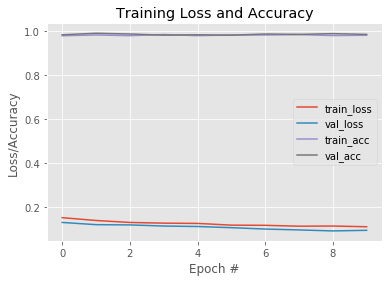

In [31]:
plot_train_history(H,n_epochs)

### Save Model

In [ ]:
res_model.save('test_save_method2.pt')

### Load Model


In [ ]:
# TODO Create model method
res_model.load('test_train.pt',True)

### Test Model

In [ ]:
# Deploy Model

